<a href="https://colab.research.google.com/github/s-c-soma/Deeplearning-CMPE-258/blob/main/Assignment_1_%20Part_1/Assignment1_part1_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blackbox deep learning-fastai

# Implementation Details and Discussion

* **Image Classification using cnn_learner**: I have implemented image classification from PETS data set to classify dog images using cnn_learner. It can be changed promptly to classify cat images also. The training loss is here 0.06. To verify this, I have uploaded a dog image and model is able to recognize it with probability 'it's a dog: 0.999774'.

* **Segmentation using unet_learner**: I have implemented segmentation in computer vision area using image dataset and 'unet_learner' from fastai. Segmentation can be used to localize a object in a picture. Here I have used the subset of Camvid dataset. I have also tried to use the main Camvid dataset, but it is causing memory problem in colab. After 7 epoch I have found that, training loss is 0.915103 and validation loss is 0.824761. I have also visualized the k instances that contributed the most to the validation loss by using the SegmentationInterpretation class.

* **Sentiment Analysis using text_classifier_learner**: Sentiment analysis of IMDB has been done here using text_classifier_learner. This dataset contains movie reviews. As a part of natural language processing (NLP) using the fast ai library, the model is able to recognize the positive and negative sentiments of the movie reviews. For testing purpose, I have tried with different review comments including positive and negative. Each time it is able to recognize pos/neg, but cann't detect the average sentiments.  The second part of the result is the index of "pos" in the data vocabulary and the last part is the probabilities to each class (e.g. 99.6% for "pos" and 0.4% for "neg"

* **Decisiontree using tabular_learner**:  Using Adult dataset and tabular_learner, I have implemented decision tree. Here the model predicts whether a person is a high-income earner, based on their socioeconomic background. Loss is also ploted to visualize

* **Ranking using collab_learner**: Ranking is very important for recommendation system. Here I have used MovieLens dataset, to predict the movies for users according to their previous viewing choice etc. After 5 iteration, training loss is 0.661406	and validation loss is 0.701385. I have also printed 
few examples of user and movie IDs, actual ratings, and predictions using show_results.








# Check if GPU/TPU available

In [20]:
!nvidia-smi

Mon Feb  8 10:18:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    37W / 250W |  11959MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Fast AI setup- Libraries

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.2MB/s 
     |████████████████████████████████| 194kB 8.5MB/s 
     |████████████████████████████████| 1.2MB 11.7MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

#  1.cnn_learner for image classification



In [3]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

#function for cat
def is_cat(x): return x[0].isupper()

#function for dog
def is_dog(x): return x[0].islower()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.136751,0.016489,0.002706,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.062777,0.007482,0.004060,00:32


## Testing

Upload a dog image here to test.

In [5]:
# Testing with my own image:
import ipywidgets as widgets
#hide_output
uploader = widgets.FileUpload()
uploader


FileUpload(value={}, description='Upload')

In [6]:

img = PILImage.create(uploader.data[0])
is_dog,_,probs = learn.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 0.999774


# 2.unet_learner for segmentation

### Computer vision segmentation



In [6]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.046627,2.422488,00:01


epoch,train_loss,valid_loss,time
0,1.713038,1.420927,00:01
1,1.491162,1.210269,00:01
2,1.366626,1.237769,00:01
3,1.251758,0.986264,00:01
4,1.170236,0.937904,00:01
5,1.069543,0.881575,00:01
6,0.983832,0.830485,00:01
7,0.915103,0.824761,00:01


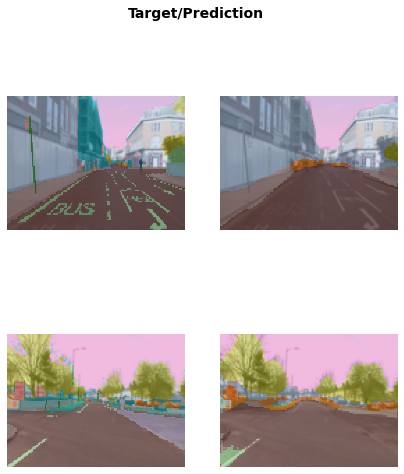

In [7]:
learn.show_results(max_n=6, figsize=(7,8))

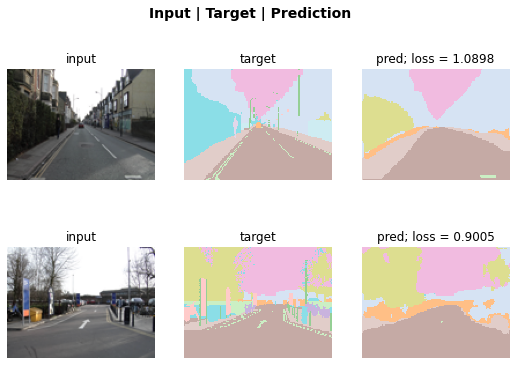

In [ ]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=2)

# 3.text_classifier_learner for sentiment analysis

## Natural language processing

In [9]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.463664,0.422243,0.812160,02:19


epoch,train_loss,valid_loss,accuracy,time
0,0.281337,0.235208,0.902640,04:18
1,0.222766,0.201917,0.922560,04:19


## Testing
Predictions are done with `predict`, as for computer vision:

In [10]:
learn.predict("The movie is so so.")

('pos', tensor(1), tensor([0.0796, 0.9204]))

In [11]:
learn.predict("The movie is average.")

('pos', tensor(1), tensor([0.1351, 0.8649]))

In [12]:
learn.predict("The movie is not good.")

('neg', tensor(0), tensor([0.9279, 0.0721]))

In [13]:
learn.predict("The movie is full of violence.")

('pos', tensor(1), tensor([0.2996, 0.7004]))

# 4.tabular_learner for decisiontree

https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb

## Tabular

In [15]:
from fastai.tabular.all import *

path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.357159,0.366518,0.832002,00:07
1,0.359335,0.352080,0.833538,00:07
2,0.346497,0.351570,0.837991,00:07
3,0.353408,0.348376,0.838759,00:07
4,0.335650,0.348115,0.838452,00:07


SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=9.12010818865383e-07)

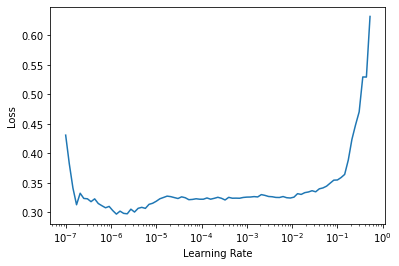

In [16]:
learn.lr_find()

In [19]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.345253,0.353763,0.836456,00:07
1,0.345872,0.352161,0.836302,00:07
2,0.323754,0.349386,0.839220,00:07


In [18]:
import pandas as pd 
# initialize list of lists 
data = [['private', 'Assoc-acdm', 'Married-civ-spouse','#na#','wife', 'white', 50.0, 101320.001685, 12.0]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'age','fnlwgt','education-num']) 
learn.predict(df.iloc[0]) # returns row, class, probability

(   workclass  education  marital-status  occupation  relationship  race  \
 0        0.0        8.0             3.0         0.0           0.0   0.0   
 
    education-num_na       age    fnlwgt  education-num  salary  
 0               1.0  0.833901 -0.837445       0.751246     0.0  ,
 tensor(0),
 tensor([0.6181, 0.3819]))

# 5.collab_learner for ranking

## Recommendation systems

In [12]:
from fastai.collab import *

path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(6)

epoch,train_loss,valid_loss,time
0,1.490564,1.414424,00:00


epoch,train_loss,valid_loss,time
0,1.365165,1.328981,00:00
1,1.177994,1.022502,00:00
2,0.900802,0.784888,00:00
3,0.752451,0.719964,00:00
4,0.679934,0.703459,00:00
5,0.661406,0.701385,00:00


In [13]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,73.0,38.0,4.0,4.026762
1,64.0,39.0,4.0,3.913205
2,48.0,72.0,2.0,3.377517
3,4.0,79.0,3.0,3.979091
4,16.0,16.0,5.0,4.272700
5,57.0,91.0,2.5,3.441843
6,69.0,63.0,5.0,4.113118
7,63.0,74.0,3.0,2.870276
8,36.0,38.0,5.0,4.326025
